# <p style="background-color:white; color:black; text-align:center">Analyse des données StackOverflow</p>

Import des librairies nécessaires

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.express as px
from matplotlib.colors import ListedColormap
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

import pymongo

Téléchargement des données nltk

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\x_mat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\x_mat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\x_mat\AppData\Roaming\nltk_data...
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\x_mat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

Chargement de la palette des couleurs pour les graphiques

In [3]:
palette = sns.color_palette("rocket")

darker = palette[0]
dark = palette[1]
medium = palette[2]
redish = palette[3]
light = palette[4]
lighter = palette[5]

colors = ['green' if (i == 0 and j == 0) or (i == 1 and j == 1) else 'red' for i in range(2) for j in range(2)]
cmap_cm = ListedColormap(colors)

sns.set_style('darkgrid')

cmap = sns.color_palette("rocket", as_cmap=True)

Modification des paramètres par défaut des graphiques

In [4]:
title_font = {'fontname':'Arial', 'size':'18', 'color':'black', 'weight':'normal', 'verticalalignment':'bottom'}
axis_font = {'fontname':'Arial', 'size':'14', 'weight':'normal', 'color':'black', 'verticalalignment':'top'}
ticks_font = {'fontname':'Arial', 'size':'15', 'weight':'normal'}
legend_font = {'fontname':'Arial', 'size':'13', 'weight':'normal'}
label_font = {'fontname':'Arial', 'size':'12', 'weight':'normal'}

In [5]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'semibold'
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['legend.labelspacing'] = 1
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.framealpha'] = 0.9
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fancybox'] = True

Import des données

In [6]:
client = pymongo.MongoClient('localhost', 27017)
db = client['stackoverflow']
collection = db['so_scrapper']
data = pd.DataFrame(list(collection.find()))
data = data.drop(columns=['_id'])

Prévisualisation des données

In [7]:
data.head()

,title,link,summary,tags,author_details,date
0,React native app freezes when calculating date...,/questions/78763875/react-native-app-freezes-w...,\n I'm fairly new to programmin...,"[react-native, date-fns]",\nNikoline Vejby\n,2024-07-18 10:38:42Z
1,Access SharePoint Site with Access Token,/questions/78763873/access-sharepoint-site-wit...,\n I am trying to access Share ...,"[access-token, sharepoint-online]",\nRAJESH\n,2024-07-18 10:38:39Z
2,What is the difference between aes encryption ...,/questions/78763871/what-is-the-difference-bet...,\n When I use JavaScript to enc...,"[python, encryption, aes]",\nSingun\n,2024-07-18 10:38:06Z
3,I'm trying to make a login system in C languag...,/questions/78763870/im-trying-to-make-a-login-...,\n However there are two proble...,"[c, authentication]",\nReaper Rapper-san's Eye\n,2024-07-18 10:37:56Z
4,executing python script by php in apache2 webs...,/questions/78763869/executing-python-script-by...,\n I have a python script that ...,"[php, python-3.x, linux]",\nSubrath kumar\n,2024-07-18 10:37:55Z


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45020 entries, 0 to 45019
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           45020 non-null  object
 1   link            45020 non-null  object
 2   summary         45020 non-null  object
 3   tags            45020 non-null  object
 4   author_details  45020 non-null  object
 5   date            45020 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [9]:
data.isnull().sum()

title             0
link              0
summary           0
tags              0
author_details    0
date              0
dtype: int64

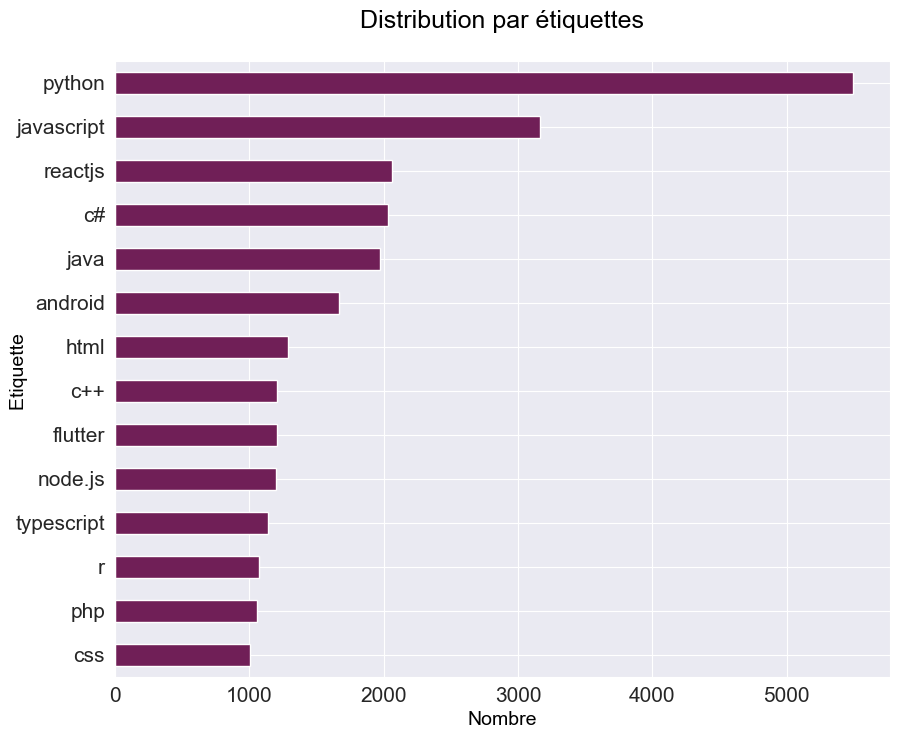

In [10]:
tags = data['tags'].explode()
tags = tags.value_counts().sort_values(ascending=True)
tags = tags[tags > 1000]
tags.plot(kind='barh', color=dark, figsize=(10, 8))
plt.title('Distribution par étiquettes', **title_font)
plt.xlabel('Nombre', **axis_font)
plt.ylabel('Etiquette ', **axis_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.show()

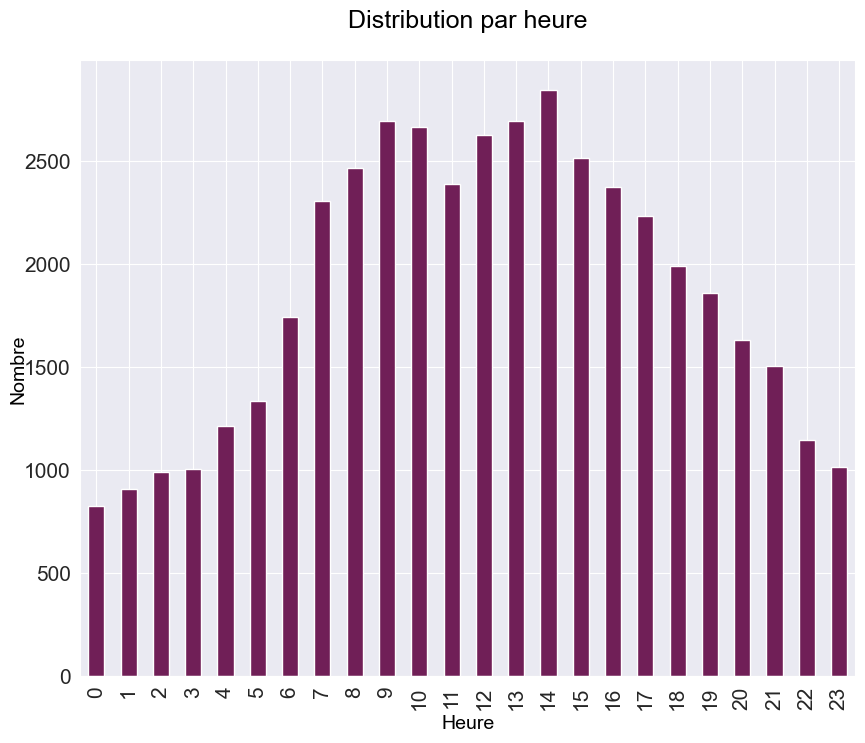

In [11]:
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['date'].dt.hour
hour = data['hour'].value_counts().sort_index()
hour.plot(kind='bar', color=dark, figsize=(10, 8))
plt.title('Distribution par heure', **title_font)
plt.xlabel('Heure', **axis_font)
plt.ylabel('Nombre', **axis_font, labelpad=10)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.show()

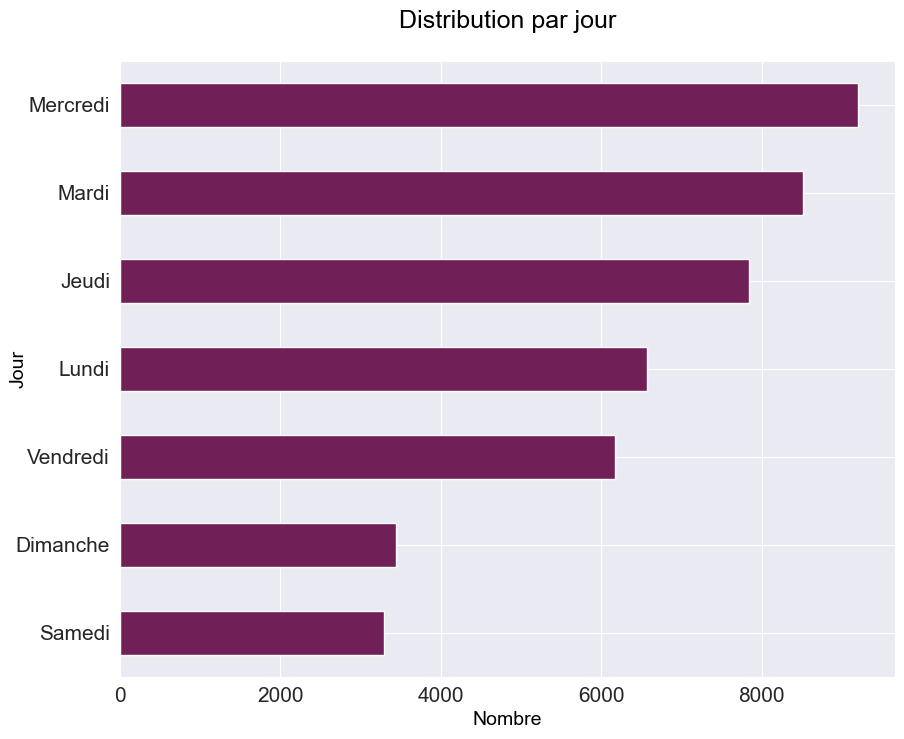

In [12]:
data['day'] = data['date'].dt.day_name('fr_FR.utf8')
day = data['day'].value_counts().sort_values(ascending=True)
day.plot(kind='barh', color=dark, figsize=(10, 8))
plt.title('Distribution par jour', **title_font)
plt.xlabel('Nombre', **axis_font)
plt.ylabel('Jour', **axis_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.show()

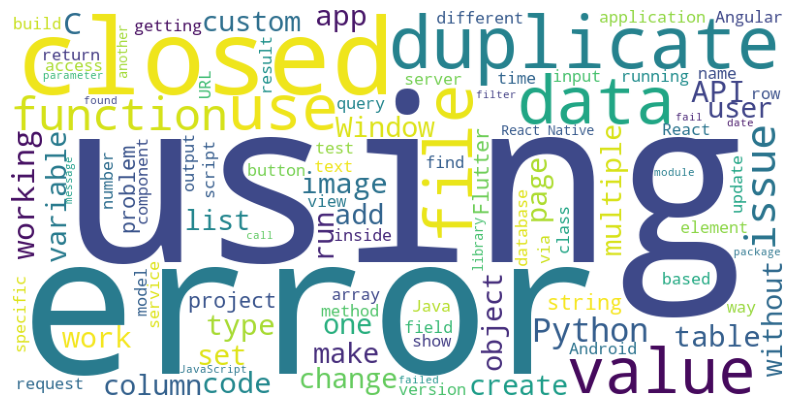

In [13]:
stop_words = set(stopwords.words('english'))
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(data['title']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

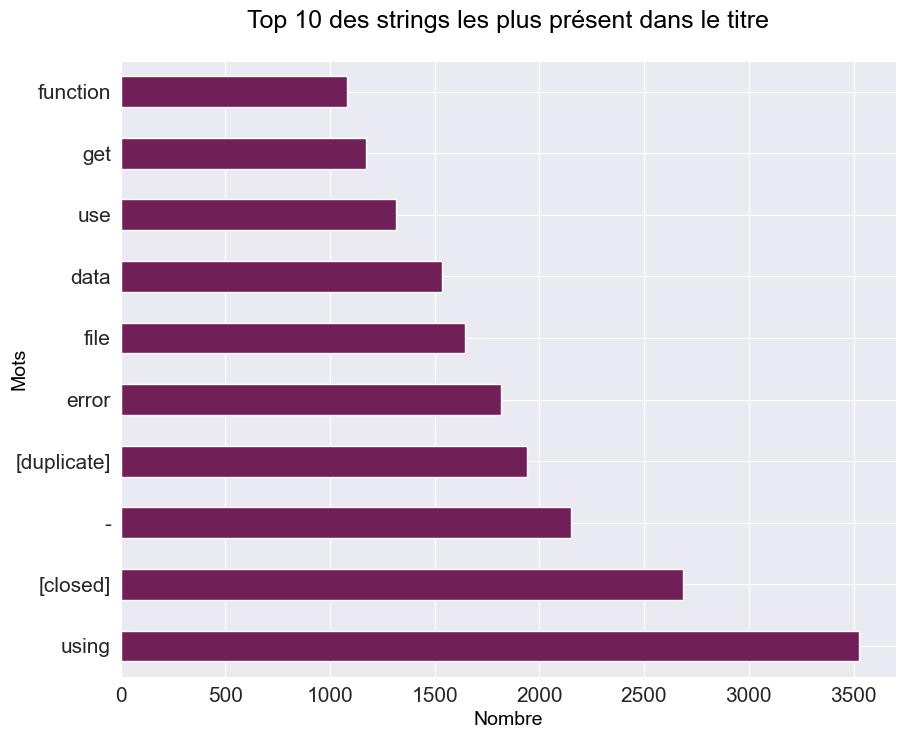

In [19]:
words = data['title'].str.split(expand=True).stack()
words = words.value_counts().sort_values(ascending=False)
words = words[~words.index.isin(stop_words)]
words = words[:10]
words.plot(kind='barh', color=dark, figsize=(10, 8))
plt.title('Top 10 des strings les plus présent dans le titre', **title_font)
plt.xlabel('Nombre', **axis_font)
plt.ylabel('Mots', **axis_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.show()